In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/westminster-fairplay-historical-weather.csv')

In [3]:
#df.dtypes

In [4]:
#df.info()
# https://openweathermap.org/api/history-forecast-bulk#sample

In [114]:
df.tail()

Index(['forecast dt unixtime', 'forecast dt iso', 'slice dt unixtime',
       'slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'snow', 'ice', 'fr_rain', 'convective', 'snow_depth',
       'accumulated', 'hours', 'rate', 'probability', 'date', 'forecast date',
       'year', 'month', 'slice date', 'slice time', 'day', 'season'],
      dtype='object')

In [75]:
# Normalize the latitude
print("Before: ", df.lat[2337844])
print("Before: ", df.lat[0])
df.lat = round(df.lat.copy(), 6)
print("After:  ", df.lat[2337844])
print("After:  ", df.lat[0])

# Get Day, Month, Year from Forecast ISO
df['forecast date'] = pd.to_datetime(df['forecast dt unixtime'],unit='s')
df['year'] = pd.DatetimeIndex(df['forecast date']).year
df['month'] = pd.DatetimeIndex(df['forecast date']).month
df['day'] = pd.DatetimeIndex(df['forecast date']).day

# Get hour from slice times
df['slice date'] = pd.to_datetime(df['slice dt unixtime'],unit='s')
df['slice time'] = pd.DatetimeIndex(df['slice date']).hour

# Get Seasons
seasons = {'winter': [12, 1, 2], 'spring': [3, 4, 5], 'summer': [6, 7, 8], 'fall': [9, 10, 11]}

# create a list of our conditions
conditions = [
    (df['month'].isin(seasons['winter'])),
    (df['month'].isin(seasons['spring'])),
    (df['month'].isin(seasons['summer'])),
    (df['month'].isin(seasons['fall'])),
    ]

# create a list of the values we want to assign for each condition
values = ['winter', 'spring', 'summer', 'fall']

# create a new column and use np.select to assign values to it using our lists as arguments
df['season'] = np.select(conditions, values)

# display updated DataFrame
df.head()

Before:  39.836653
Before:  39.224713
After:   39.836653
After:   39.224713


,forecast dt unixtime,forecast dt iso,slice dt unixtime,slice dt iso,lat,lon,temperature,dew_point,pressure,ground_pressure,...,rate,probability,date,forecast date,year,month,slice date,slice time,day,season
0,1507334400,2017-10-07 00:00:00 +0000 UTC,1507334400,2017-10-07 00:00:00 +0000 UTC,39.224713,-106.001962,3.05,-9.95,1013.70,711.71,...,0.0,0.0,2017-10-07,2017-10-07,2017,10,2017-10-07 00:00:00,0,7,fall
1,1507334400,2017-10-07 00:00:00 +0000 UTC,1507338000,2017-10-07 01:00:00 +0000 UTC,39.224713,-106.001962,1.42,-9.08,1014.96,712.17,...,0.0,0.0,2017-10-07,2017-10-07,2017,10,2017-10-07 01:00:00,1,7,fall
2,1507334400,2017-10-07 00:00:00 +0000 UTC,1507341600,2017-10-07 02:00:00 +0000 UTC,39.224713,-106.001962,0.24,-8.45,1016.18,712.64,...,0.0,0.0,2017-10-07,2017-10-07,2017,10,2017-10-07 02:00:00,2,7,fall
3,1507334400,2017-10-07 00:00:00 +0000 UTC,1507345200,2017-10-07 03:00:00 +0000 UTC,39.224713,-106.001962,-0.54,-8.05,1017.31,713.09,...,0.0,0.0,2017-10-07,2017-10-07,2017,10,2017-10-07 03:00:00,3,7,fall
4,1507334400,2017-10-07 00:00:00 +0000 UTC,1507348800,2017-10-07 04:00:00 +0000 UTC,39.224713,-106.001962,-1.00,-7.85,1018.28,713.50,...,0.0,0.0,2017-10-07,2017-10-07,2017,10,2017-10-07 04:00:00,4,7,fall


In [109]:
df_with_date = df.drop(['forecast dt unixtime', 'forecast dt iso', 'slice dt unixtime', 'slice dt iso'], axis=1)
df_with_date.head()

,lat,lon,temperature,dew_point,pressure,ground_pressure,humidity,clouds,wind_speed,wind_deg,...,rate,probability,date,forecast date,year,month,slice date,slice time,day,season
0,39.224713,-106.001962,3.05,-9.95,1013.70,711.71,37.90,0.0,8.02,302.18,...,0.0,0.0,2017-10-07,2017-10-07,2017,10,2017-10-07 00:00:00,0,7,fall
1,39.224713,-106.001962,1.42,-9.08,1014.96,712.17,46.09,1.0,5.66,301.79,...,0.0,0.0,2017-10-07,2017-10-07,2017,10,2017-10-07 01:00:00,1,7,fall
2,39.224713,-106.001962,0.24,-8.45,1016.18,712.64,52.32,2.0,4.16,299.49,...,0.0,0.0,2017-10-07,2017-10-07,2017,10,2017-10-07 02:00:00,2,7,fall
3,39.224713,-106.001962,-0.54,-8.05,1017.31,713.09,56.71,2.0,3.34,296.08,...,0.0,0.0,2017-10-07,2017-10-07,2017,10,2017-10-07 03:00:00,3,7,fall
4,39.224713,-106.001962,-1.00,-7.85,1018.28,713.50,59.40,2.0,3.03,292.35,...,0.0,0.0,2017-10-07,2017-10-07,2017,10,2017-10-07 04:00:00,4,7,fall


In [115]:
df_westy = df_with_date.loc[(df['lat']==39.836653) & (df['lon']==-105.037205)]
df_westy = df_westy.drop(['lat', 'lon'], axis=1)
df.columns

Index(['forecast dt unixtime', 'forecast dt iso', 'slice dt unixtime',
       'slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'snow', 'ice', 'fr_rain', 'convective', 'snow_depth',
       'accumulated', 'hours', 'rate', 'probability', 'date', 'forecast date',
       'year', 'month', 'slice date', 'slice time', 'day', 'season'],
      dtype='object')

In [186]:
df_westy_grouped = df_westy.groupby(['season', 'year']).mean()[['temperature', 'humidity', 'wind_speed', 'rain', 'snow']]
df_westy_grouped

temperature   humidity  wind_speed      rain      snow
season year                                                        
fall   2017     7.798743  43.198295    2.618242  0.008228  0.026225
       2018    10.028319  47.998888    2.592707  0.039023  0.027331
       2019     9.201981  46.957986    2.839257  0.015580  0.025031
       2020    10.838346  37.590340    2.561816  0.006796  0.017964
       2021    12.491031  36.075001    2.779190  0.012147  0.009006
spring 2018    12.459431  43.240151    3.318919  0.104673  0.029785
       2019    10.105016  52.742985    3.003829  0.108507  0.037931
       2020    11.997159  47.930492    3.248879  0.052848  0.032485
       2021    10.689829  53.633094    3.095576  0.060704  0.057695
       2022    11.583185  43.928759    3.648624  0.039837  0.035460
summer 2018    24.034043  39.177152    2.895809  0.110818  0.000000
       2019    23.748408  40.255273    3.155105  0.083996  0.000000
       2020    24.900970  33.155792    3.307251  0.050238  0.000118
       2021    24.628082  38.467710    3.170530  0.058148  0.000000
       2022    23.902935  38.916941    3.390307  0.052704  0.000000
winter 2017    -0.802626  53.670386    2.599594  0.000574  0.044419
       2018     0.507119  54.206981    2.593190  0.001918  0.041776
       2019     0.017547  53.455725    2.534102  0.001706  0.031849
       2020    -0.086496  52.590236    2.614422  0.000859  0.028279
       2021    -0.032993  50.961637    2.700473  0.001053  0.026255
       2022    -0.399422  62.060616    2.415949  0.001025  0.042973

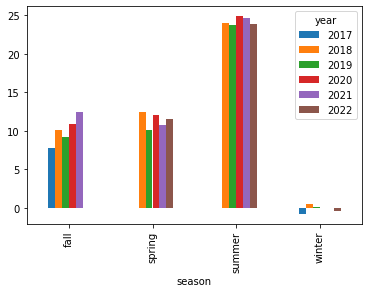

In [189]:
df_westy_grouped['temperature'].unstack('year').plot.bar()